In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
BATCH_SIZE = 5

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   horizontal_flip = True, # 랜덤하게 50%를 생성
                                   width_shift_range = 0.1, # 좌/우 10% 범위 내에서 이동
                                   height_shift_range = 0.1, # 상/하 10% 범위 내에서 이동
                                   fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory('train',
                                                    target_size = (150, 150),
                                                    batch_size = BATCH_SIZE,
                                                    class_mode = 'binary')

test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory('test',
                                                    target_size = (150, 150),
                                                    batch_size = BATCH_SIZE,
                                                    class_mode = 'binary')

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape = (150, 150, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = 2))
model.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = 2))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = 2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation = 'softmax'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [5]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = optimizers.Adam(learning_rate = 0.0002),
              metrics= ['accuracy'])

In [6]:
steps_train = len(train_generator)
steps_test = len(test_generator)
print(steps_train, steps_test)

32 24


In [7]:
history = model.fit(train_generator,
         steps_per_epoch=steps_train,
         epochs=20,
         validation_data=test_generator,
         validation_steps=steps_test)

Epoch 1/20
32/32 [==============================] - 3s 81ms/step - loss: 0.7118 - accuracy: 0.5250 - val_loss: 0.7165 - val_accuracy: 0.5000
Epoch 2/20
32/32 [==============================] - 2s 75ms/step - loss: 0.7076 - accuracy: 0.4563 - val_loss: 0.6910 - val_accuracy: 0.5000
Epoch 3/20
32/32 [==============================] - 2s 75ms/step - loss: 0.6939 - accuracy: 0.4875 - val_loss: 0.6871 - val_accuracy: 0.8000
Epoch 4/20
32/32 [==============================] - 2s 74ms/step - loss: 0.6882 - accuracy: 0.5562 - val_loss: 0.6818 - val_accuracy: 0.5083
Epoch 5/20
32/32 [==============================] - 2s 75ms/step - loss: 0.6748 - accuracy: 0.6438 - val_loss: 0.6623 - val_accuracy: 0.5917
Epoch 6/20
32/32 [==============================] - 2s 75ms/step - loss: 0.6595 - accuracy: 0.6500 - val_loss: 0.6210 - val_accuracy: 0.7750
Epoch 7/20
32/32 [==============================] - 2s 75ms/step - loss: 0.6370 - accuracy: 0.6625 - val_loss: 0.5750 - val_accuracy: 0.8500
Epoch 8/20
32

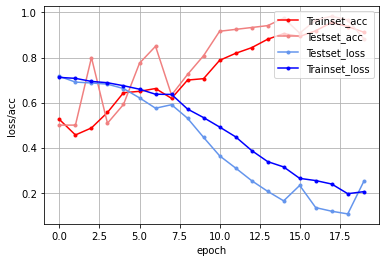

In [8]:
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))  
plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right') 
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()